In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from cycler import cycler
from scipy.special import comb as nCr
plt.style.use('alex')

<h3> Let's start off easy and make sure we understand the shape of the Bernoulli distribution  </h3>

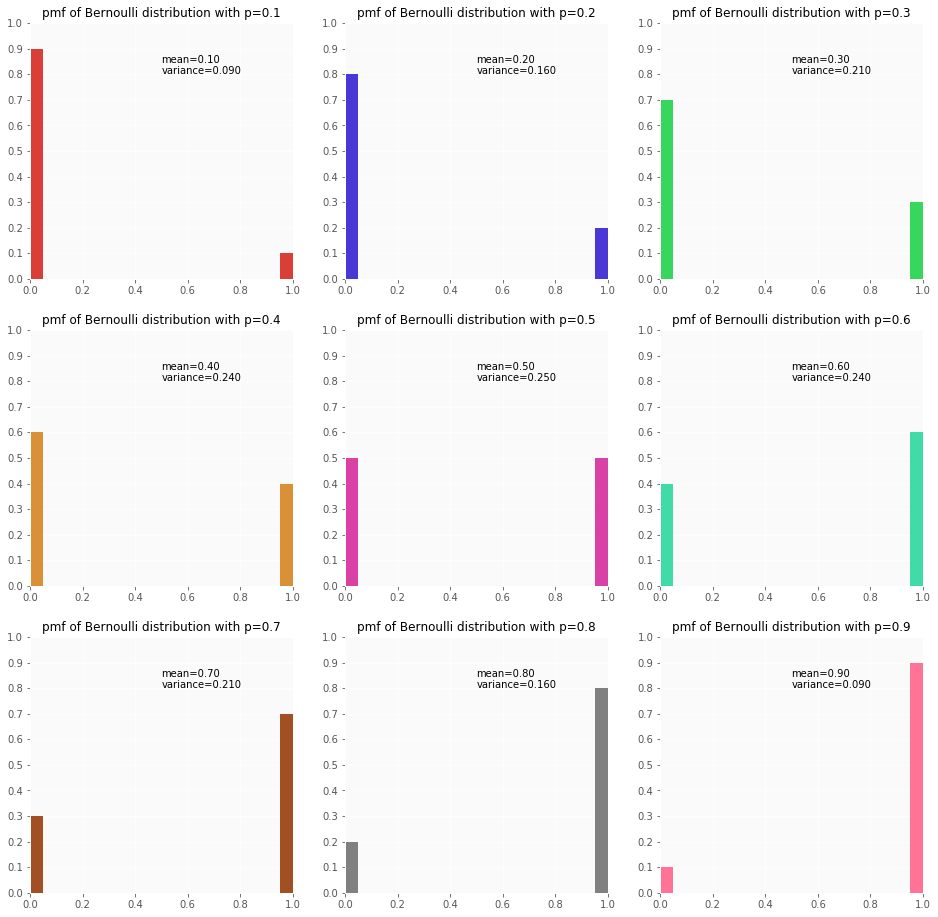

In [111]:
pmf_vals = []
stats = []
p_vals = np.arange(0.1,1,0.1)

for p_val in p_vals:
    X = bernoulli(p=p_val)
    mean, var, skew, kurt = bernoulli.stats(p_val, moments ='mvsk')
    pmf = [X.pmf(k=0), X.pmf(k=1)]
    pmf_vals.append(pmf)
    stats.append([mean,var])
    

iterator = 0
n_rows = 3
n_cols = 3

colors = [prop['color'] for prop in plt.rcParams['axes.prop_cycle']]
fig, ax = plt.subplots(n_rows,n_cols,figsize=(16,16))

for i in range(n_rows):
    for j in range(n_cols):
        ax[i,j].bar(x_space, pmf_vals[iterator], color = colors[iterator], width=0.1)
        ax[i,j].set_title('pmf of Bernoulli distribution with p={:.1f}'.format(p_vals[iterator]), fontsize='12')
        ax[i,j].text(x=0.5, y=0.8, s= 'mean={:.2f}\nvariance={:.3f}'.format(float(stats[iterator][0]),float(stats[iterator][1])))
        ax[i,j].set_ylim(0,1)
        ax[i,j].set_yticks(np.arange(0,1.1,0.1))
        ax[i,j].set_xlim(0,1)
        iterator += 1
plt.show()


<h3> Let X be a Binomial Random Variable with $p$ = 0.7 and $n$ = sample size =  25 </h3>
<h3> Then the distribution of ($X$ = # of successes) can be modeled by a series/set of samples each containing 25 i.i.d. Bernoulli trials (i.e. r.v.'s with Bernoulli distribution) </h3>

In [291]:
def binomial_pdf(n,p,k):
    y = nCr(N=n,k=k)*(p**k)*((1-p)**(n-k))
    return y

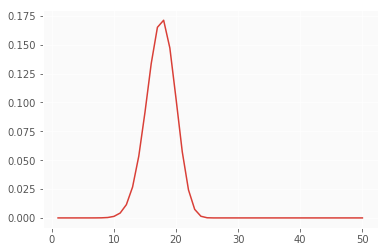

In [298]:
x_space = list(range(1,51));
y = [binomial_pdf(n=25, p=0.7, k=x) for x in x_space]

plt.plot(x,y)
plt.show()

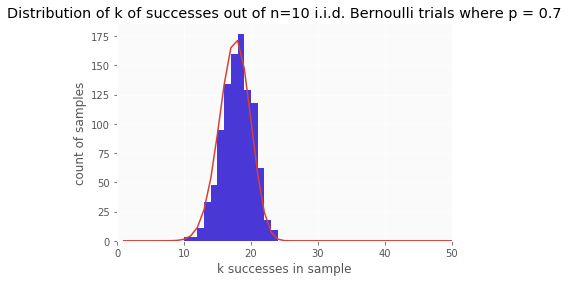

In [304]:
n_samples = 1000;
n_trials = 25;
p = 0.7;
results = []


for i in range(n_samples):
    n_successes = sum(np.random.binomial(1,p,n_trials))
    results.append(n_successes)
    
x_space = list(range(1,51));
y = [binomial_pdf(n=25, p=0.7, k=x)*1000 for x in x_space]

plt.plot(x,y)

plt.hist(results, bins=14)
plt.xlim(0,50)
plt.title('Distribution of k of successes out of n=10 i.i.d. Bernoulli trials where p = 0.7')
plt.xlabel('k successes in sample')
plt.ylabel('count of samples')
plt.show()

<h3>Let $X$ be a Bernoulli random variable with $p$ = 0.3 </h3>
<h4>If we consider a process in which we sequentially observe events from $X$, then the distribution of the number of trials between each success is a Geometric distribution $Geom(p)$ </h4>


In [308]:
def geometric_pmf(p,k):
    y = (1-p)**(k-1)*p
    return y

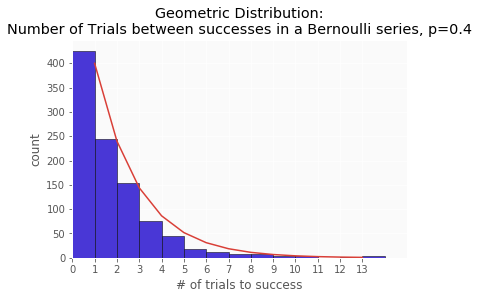

In [323]:
n_samples = 1000;
p = 0.4;
n_successes = []


pos1 = 0
trials_since_success = 0
results = []

for i in range(n_samples):
    trial_result = 0
    while trial_result != 1:
        trial_result = np.random.binomial(1,p)

        if trial_result == 0:
            trials_since_success += 1
        else:
            trials_to_success = trials_since_success
            results.append(trials_to_success)
            trials_since_success = 0
        
  


x_space = list(range(1,14))
y = [geometric_pmf(p=0.4,k=x)*1000 for x in x_space]
plt.plot(x_space,y)

plt.hist(results, bins=14, edgecolor = 'black')
plt.title('Geometric Distribution:\nNumber of Trials between successes in a Bernoulli series, p=0.4')
plt.xlabel('# of trials to success')
plt.xlim(0,15)
plt.xticks(range(14))
plt.ylabel('count')



plt.show()

<h3>Now let X be a Bernoulli r.v. with success probability p = 0.4 </h3>
<h4>Then the arrival of the r-th success is a random variable with a negative binomial distribution NegBin(r,p) $r$</h4>
<h4>First we will hold r constant while varying $p$ = probability of success for each Bernoulli trial</h4>

In [327]:
def negativeBinomial_pmf(p,r,k):
    y = nCr(N=k+r-1, k=k)*((1-p)**r)*p**k
    return y

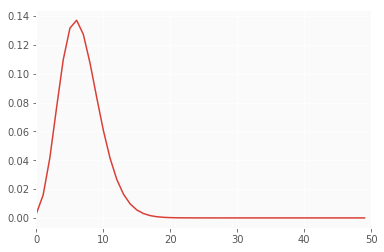

In [340]:
x_space = list(range(0,50))
y = [negativeBinomial_pmf(p=0.25,r=20,k=x) for x in x_space]

plt.plot(x_space, y)
plt.xlim(0,50)
plt.show()

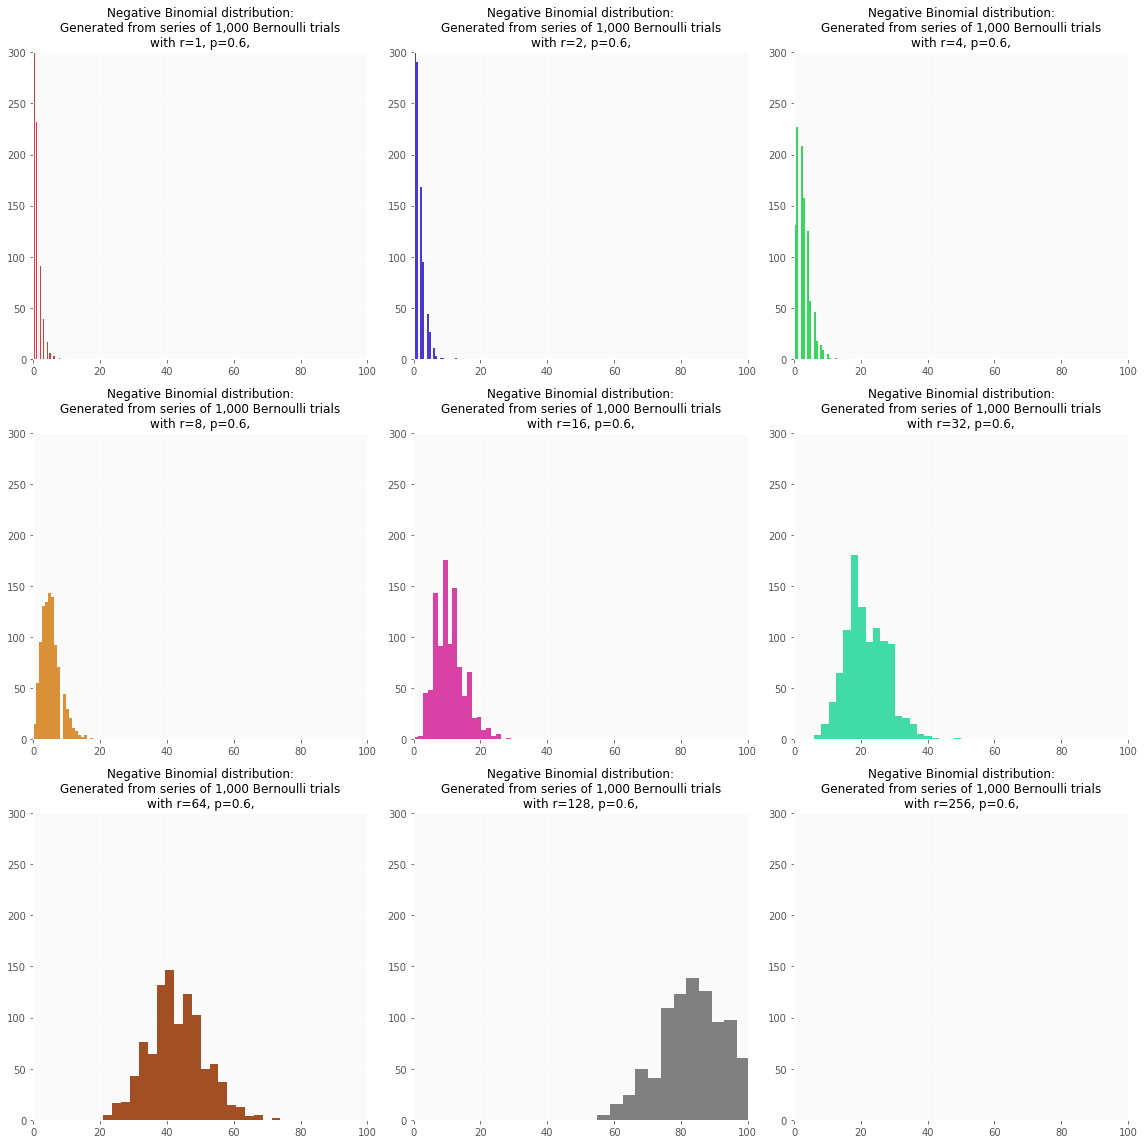

In [227]:
p = 0.6
n_samples = 1000
r_list = [1,2,4,8,16,32,64,128,256]
final = []
for r in r_list:
    n_successes = 0
    n_failures = 0
    n_trials = 0
    results = []

    for i in range(n_samples):
        n_failures = 0
        n_successes = 0
        n_trials = 0
        while n_successes < r:
            trial_result = np.random.binomial(1,p)

            if trial_result == 0:
                n_failures += 1
            else:
                n_successes += 1
                

        results.append(n_failures)
    final.append(results)


n_rows = 3
n_cols = 3
iterator = 0

colors = [prop['color'] for prop in plt.rcParams['axes.prop_cycle']]
fig, ax = plt.subplots(n_rows,n_cols,figsize=(16,16))

for i in range(n_rows):
    for j in range(n_cols):
        
        ax[i,j].hist(final[iterator], bins = 20, color = colors[iterator])
        ax[i,j].set_title('Negative Binomial distribution:\nGenerated from series of 1,000 Bernoulli trials\nwith r={}, p={},'.format(r_list[iterator],p), fontsize='12')
        #ax[i,j].text(x=0.5, y=0.8, s= 'mean={:.2f}\nvariance={:.3f}'.format(float(stats[iterator][0]),float(stats[iterator][1])))
        ax[i,j].set_ylim(0,300)
        #ax[i,j].set_yticks(np.arange(0,1.1,0.1))
        ax[i,j].set_xlim(0,100)
        iterator += 1
        
plt.tight_layout()
plt.show()



